In [127]:
%reload_ext autoreload
%autoreload 2

import pandas, scipy, numpy
import sklearn.ensemble
import sklearn.metrics
from IPython.display import Image

from lad import lad

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/axa/anaconda/envs/basic/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


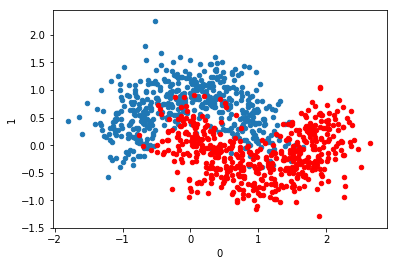

In [128]:
from sklearn.datasets import make_moons

def get_moons(random_state=0, n_samples=1000):
    X, y = make_moons(noise=0.3, random_state=random_state, n_samples=n_samples)
    
    return (pandas.DataFrame(X), pandas.Series(y, name='labels'))

## Get dataset

#X, y = get_linearly_separable(n_samples=1000, random_state=4)
X, y = get_moons(n_samples=1000, random_state=4)
#X, y = get_xor(n_samples=1000)
#X, y = get_circles(n_samples=1000, random_state=4)

ylabels = ['Class 0', 'Class 1']
features_names = ['feature 0', 'feature 1']

fig, ax = subplots(1)
X[y==0].plot(kind='scatter', x=0, y=1, ax=ax)
X[y==1].plot(kind='scatter', x=0, y=1, ax=ax, c='r')

In [129]:
## Train a back-box classifier on the synthetic dataset
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(X, y, test_size=0.20)

clf = sklearn.ensemble.RandomForestClassifier(n_estimators=200)
clf.fit(train, labels_train)

print(sklearn.metrics.accuracy_score(labels_test, clf.predict(test)))
print(sklearn.metrics.classification_report(labels_test, clf.predict(test)))

0.925
             precision    recall  f1-score   support

          0       0.94      0.91      0.92       101
          1       0.91      0.94      0.93        99

avg / total       0.93      0.93      0.92       200



In [142]:
ls = lad.LocalSurrogate(X, blackbox=clf, n_support_points=100, max_depth=5)

In [143]:
x_toexplain = pandas.Series([0,0])
#x_toexplain.iloc[1] = x_toexplain.iloc[1]+0.01
support_points, surrogate = ls.get_local_surrogate(x_toexplain)

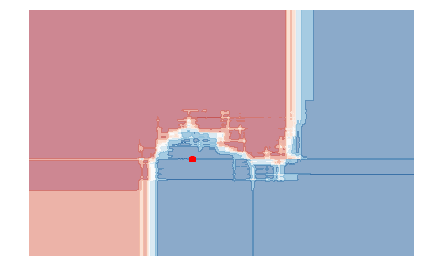

In [144]:
ls.plot_support_points(X, x_toexplain, support_points,
                            plot_support_points=False,
                            plot_segment_points=False,
                            plot_touchpoints=False)
axis('off')
tight_layout()
savefig('/Users/axa/Desktop/ECML_adversarial/01_x_toexplain.png')
savefig('/Users/axa/Desktop/ECML_adversarial/01_x_toexplain.pdf')

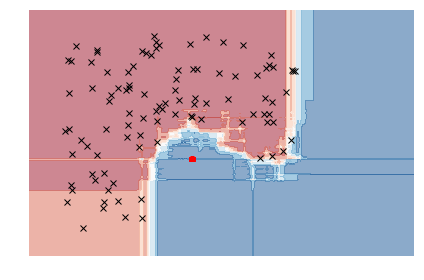

In [145]:
ls.plot_support_points(X, x_toexplain, support_points,
                            plot_support_points=True,
                            plot_segment_points=False,
                            plot_touchpoints=False)
axis('off')
tight_layout()
savefig('/Users/axa/Desktop/ECML_adversarial/02_support_points.png')
savefig('/Users/axa/Desktop/ECML_adversarial/02_support_points.pdf')

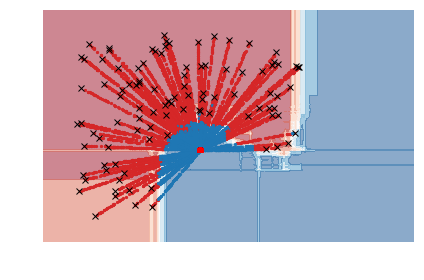

In [146]:
ls.plot_support_points(X, x_toexplain, support_points,
                            plot_support_points=True,
                            plot_segment_points=True,
                            plot_touchpoints=False)
axis('off')
tight_layout()
savefig('/Users/axa/Desktop/ECML_adversarial/03_segments.png')
savefig('/Users/axa/Desktop/ECML_adversarial/03_segments.pdf')

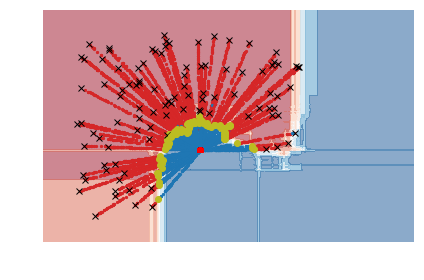

In [147]:
ls.plot_support_points(X, x_toexplain, support_points,
                            plot_support_points=True,
                            plot_segment_points=True,
                            plot_touchpoints=True)
axis('off')
tight_layout()
savefig('/Users/axa/Desktop/ECML_adversarial/04_touchpoints.png')
savefig('/Users/axa/Desktop/ECML_adversarial/04_touchpoints.pdf')

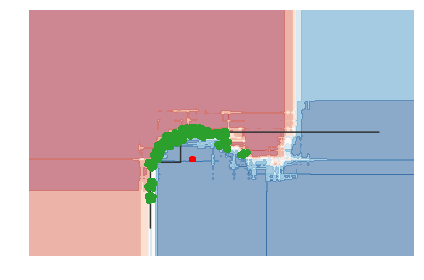

In [125]:
ls.plot_support_points(X, x_toexplain, support_points,
                            plot_support_points=False,
                            plot_segment_points=False,
                            plot_touchpoints=False,
                            plot_touchpoint_hypersphere_points=True)

ls.plot_classification_countour_line(X, surrogate, ax=ax)

axis('off')
tight_layout()
savefig('/Users/axa/Desktop/ECML_adversarial/05_touchpoint_augmented.png')
savefig('/Users/axa/Desktop/ECML_adversarial/05_touchpoint_augmented.pdf')

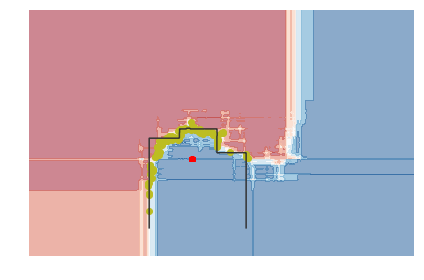

In [149]:
ax = ls.plot_support_points(X, x_toexplain, support_points,
                            plot_support_points=False,
                            plot_segment_points=False,
                            plot_touchpoints=True,
                            plot_touchpoint_hypersphere_points=False)

ls.plot_classification_countour_line(X, surrogate, ax=ax)

axis('off')
tight_layout()

savefig('/Users/axa/Desktop/ECML_adversarial/06_surrogate.png')
savefig('/Users/axa/Desktop/ECML_adversarial/06_surrogate.pdf')